In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("graduatoria-nazionale-anonima-medicina-e-odontoiatria-2022.csv", sep=";")
# df.set_index(["Posizione"], inplace=True)
df.head(5)

,Posizione,Ateneo,Codice,C.L.C.S.,Logica,Biologia,Chimica,Mat e Fisica,Punteggio TOT
0,1,Università degli Studi di VERONA,211212200054430,6,"7,5","34,5","22,5","19,5",90
1,2,Università degli Studi di Roma La Sapienza,100012102154330,6,"7,5","32,6","18,7",18,"82,8"
2,3,Università degli Studi di BOLOGNA,222000200044322,6,"7,5","28,8","20,6","19,5","82,4"
3,4,Universirà degli studi di Parma,10011111052232,6,"7,5","31,1","19,1","17,6","81,3"
4,5,Università degli Studi di BOLOGNA,211212002254432,6,"5,6","31,5","19,5","17,6","80,2"


In [63]:
df.columns[2:]

Index(['Codice', 'C.L.C.S.', 'Logica', 'Biologia', 'Chimica', 'Mat e Fisica',
       'Punteggio TOT'],
      dtype='object')

In [64]:
# print(type(df.iloc[0]["Punteggio TOT"]))
for col in df.columns[3:]:
    df[col] = df[col].apply(lambda x: float(x.replace(",", ".")))

df["Codice"] = df["Codice"].apply(lambda x: int(x))

df.head()

,Posizione,Ateneo,Codice,C.L.C.S.,Logica,Biologia,Chimica,Mat e Fisica,Punteggio TOT
0,1,Università degli Studi di VERONA,211212200054430,6.0,7.5,34.5,22.5,19.5,90.0
1,2,Università degli Studi di Roma La Sapienza,100012102154330,6.0,7.5,32.6,18.7,18.0,82.8
2,3,Università degli Studi di BOLOGNA,222000200044322,6.0,7.5,28.8,20.6,19.5,82.4
3,4,Universirà degli studi di Parma,10011111052232,6.0,7.5,31.1,19.1,17.6,81.3
4,5,Università degli Studi di BOLOGNA,211212002254432,6.0,5.6,31.5,19.5,17.6,80.2


In [65]:
df[["Posizione","Punteggio TOT"]].groupby(by="Punteggio TOT").count()

,Posizione
Punteggio TOT,
20.0,98
20.1,98
20.2,124
20.3,156
20.4,108
...,...
80.2,1
81.3,1
82.4,1


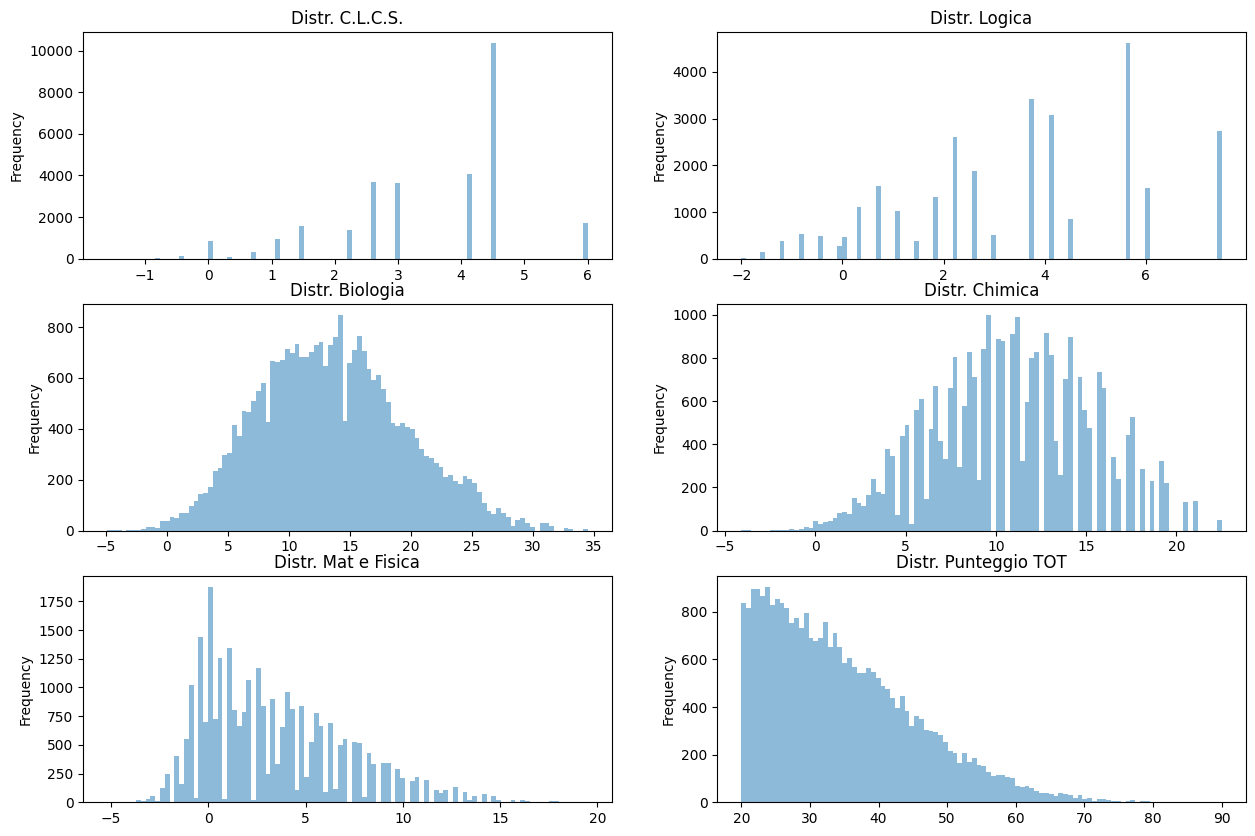

In [85]:
cols = df.columns[3:]
fig, axes = plt.subplots(3,2, figsize=(15,10))
i = 0
for x in range(3):
    for y in range(2):
        df[cols[i]].plot.hist(bins=100, alpha=0.5, ax=axes[x,y])
        axes[x, y].set_title(f"Distr. {cols[i]}")
        i += 1
    
#plt.xticks(range(20,90,5))
plt.show()